In [1]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *

In [2]:
PROCESSED_DS_DIR = "augusto_ds/processed_ds/"

In [3]:
file_path = PROCESSED_DS_DIR + "behaviorrevil.csv" # Don’t forget that there are multiple sections.
with open(file_path,"r") as f:
    table = pandas.read_csv(f)
table

,5382530088351570985,2038340943568240459,-3495225287822563407,-6184167012816453708,7099738312180619692,-1286049657302595261,3682553184252715219,-461646535997385497,-448961166194655894,2291019426270880460,...,2928935586553899192,3592312483698901076,3891766720362175360,4741820939497244407,3052972953189331242,-5870216326540581167,-4588096417221536179,4819813997944399364,-8078455863905672838,id
0,0.001266,0.000576,0.000508,0.000273,0.000790,0.000269,0.000269,0.000188,0.000184,0.000674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,612
1,0.000502,0.000301,0.000183,0.000066,0.000000,0.000021,0.000021,0.000044,0.000028,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,613
2,0.000567,0.000468,0.000180,0.000145,0.000000,0.000344,0.000344,0.000080,0.000078,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,614
3,0.189952,0.077292,0.019323,0.019435,0.000000,0.000000,0.000000,0.010718,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,615
4,0.000644,0.000279,0.000251,0.000168,0.000325,0.000133,0.000133,0.000077,0.000106,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,780
160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,781
161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,782
162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,783


In [4]:
family = []

for i in range(len(table)):
    if 192<=table["id"][i]<=206:
        family.append("clop")
    elif(207<=table["id"][i]<=310):
        family.append("conti")
    elif(311<=table["id"][i]<=355):
        family.append("egregor")
    elif(403<=table["id"][i]<=435):
        family.append("lockbit")
    elif(438<=table["id"][i]<=451):
        family.append("lockbit")
    elif(452<=table["id"][i]<=468):
        family.append("mountlocker")
    elif(480<=table["id"][i]<=557):
        family.append("netwalker")
    elif(559<=table["id"][i]<=611):
        family.append("ryuk")
    elif(612<=table["id"][i]<=711):
        family.append("revil")
    elif(712<=table["id"][i]<=784):
        family.append("goodware")
    elif(791<table["id"][i]<1446):
        family.append("revil")
    else:
        family.append("unknown")

In [5]:
# A conditional statement is needed to iterate over table and family because it seems there’s an omission in family assignment, which is causing errors in the classifiers.
# Identify the IDs of samples that are unclassified
#for i in range(max(table.shape[0], len(family)):
#    print(i, table['id'][i], family[i])

In this cell, the classification vector that I will use as the target attribute was created.

In [6]:
len(family), table.shape

(164, (164, 332480))

In [7]:
table['family'] = family
table

,5382530088351570985,2038340943568240459,-3495225287822563407,-6184167012816453708,7099738312180619692,-1286049657302595261,3682553184252715219,-461646535997385497,-448961166194655894,2291019426270880460,...,3592312483698901076,3891766720362175360,4741820939497244407,3052972953189331242,-5870216326540581167,-4588096417221536179,4819813997944399364,-8078455863905672838,id,family
0,0.001266,0.000576,0.000508,0.000273,0.000790,0.000269,0.000269,0.000188,0.000184,0.000674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,612,revil
1,0.000502,0.000301,0.000183,0.000066,0.000000,0.000021,0.000021,0.000044,0.000028,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,613,revil
2,0.000567,0.000468,0.000180,0.000145,0.000000,0.000344,0.000344,0.000080,0.000078,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,614,revil
3,0.189952,0.077292,0.019323,0.019435,0.000000,0.000000,0.000000,0.010718,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,615,revil
4,0.000644,0.000279,0.000251,0.000168,0.000325,0.000133,0.000133,0.000077,0.000106,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,616,revil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,780,goodware
160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,781,goodware
161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,782,goodware
162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,783,goodware


In [8]:
table.drop(columns=['id'], inplace=True)

In [9]:
rem = table.loc[table['family'] == 'unknown']
rem

,5382530088351570985,2038340943568240459,-3495225287822563407,-6184167012816453708,7099738312180619692,-1286049657302595261,3682553184252715219,-461646535997385497,-448961166194655894,2291019426270880460,...,2928935586553899192,3592312483698901076,3891766720362175360,4741820939497244407,3052972953189331242,-5870216326540581167,-4588096417221536179,4819813997944399364,-8078455863905672838,family


In [10]:
items_to_remove = rem.index.values.tolist()
items_to_remove

[]

In [11]:
# Removing the unknowns based on the generated list.
table.drop(table.index[items_to_remove], inplace=True)
'unknown' in table['family']

False

In [12]:
family_table = table.copy()


In [13]:
#table = family_table.copy()  # This section is solely for reusing the dataset loading process.

In [14]:
#table = family_table.loc[(family_table['family'] == 'goodware') | (family_table['family'] == 'clop')].copy()
#table = family_table.loc[(family_table['family'] == 'goodware') | (family_table['family'] == 'conti')].copy()
#table = family_table.loc[(family_table['family'] == 'goodware') | (family_table['family'] == 'egregor')].copy()
#table = family_table.loc[(family_table['family'] == 'goodware') | (family_table['family'] == 'lockbit')].copy()
#table = family_table.loc[(family_table['family'] == 'goodware') | (family_table['family'] == 'mountlocker')].copy()
#table = family_table.loc[(family_table['family'] == 'goodware') | (family_table['family'] == 'netwalker')].copy()
#table = family_table.loc[(family_table['family'] == 'goodware') | (family_table['family'] == 'revil')].copy()
#table = family_table.loc[(family_table['family'] == 'goodware') | (family_table['family'] == 'ryuk')].copy()

In [15]:
table.describe()

,5382530088351570985,2038340943568240459,-3495225287822563407,-6184167012816453708,7099738312180619692,-1286049657302595261,3682553184252715219,-461646535997385497,-448961166194655894,2291019426270880460,...,-2621629302837596472,2928935586553899192,3592312483698901076,3891766720362175360,4741820939497244407,3052972953189331242,-5870216326540581167,-4588096417221536179,4819813997944399364,-8078455863905672838
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.059874,0.026822,0.009577,0.006867,0.000027,0.000080,0.000079,0.003566,0.003755,0.000004,...,0.000277,0.000138,0.000046,0.000046,0.000046,0.000046,0.000046,0.001172,0.001172,0.001172
std,0.102656,0.049760,0.017800,0.012267,0.000138,0.000132,0.000130,0.007778,0.009899,0.000053,...,0.003545,0.001772,0.000591,0.000591,0.000591,0.000591,0.000591,0.015006,0.015006,0.015006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001313,0.000576,0.000504,0.000274,0.000000,0.000000,0.000000,0.000065,0.000079,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.131505,0.033662,0.012570,0.014950,0.000000,0.000124,0.000124,0.000987,0.000834,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.584468,0.237822,0.100193,0.077740,0.000790,0.000452,0.000425,0.047637,0.064702,0.000674,...,0.045394,0.022697,0.007566,0.007566,0.007566,0.007566,0.007566,0.192169,0.192169,0.192169


In [18]:
TestSize = 0.5

In [19]:
#classes = pandas.DataFrame(table, columns = ['family'])
classes = list(table['family'])
table.drop(columns=['family'], inplace=True)

In [22]:
family_info = {}
for family_name in classes:
    if family_name in family_info:
        family_info[family_name] += 1
    else:  
        family_info[family_name] = 1
family_info

{'revil': 92, 'goodware': 72}

In [20]:
table.shape

(164, 332479)

In [21]:
len(classes)

164

In [17]:
#table

In [16]:
#classes.count("lockbit"),classes.count("goodware")  #This part is only for binary classification.

In [23]:
train_features, test_features, train_labels, test_labels = train_test_split(table, classes, test_size=TestSize, random_state=1)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

              precision    recall  f1-score   support

    goodware       0.83      0.88      0.85        33
       revil       0.91      0.88      0.90        49

    accuracy                           0.88        82
   macro avg       0.87      0.88      0.87        82
weighted avg       0.88      0.88      0.88        82

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
CPU times: user 4 μs, sys: 46 μs, total: 50 μs
Wall time: 9.06 μs


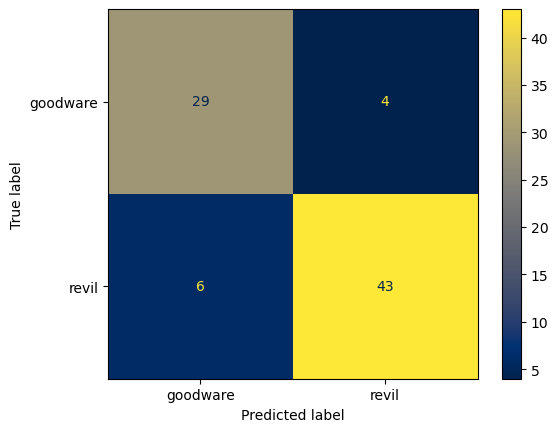

In [25]:
# KNN com GridSearch
param_gridKNN = {'n_neighbors': [1,3,5,7,9],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']}
modelKNNgrid = GridSearchCV(KNeighborsClassifier(), param_grid=param_gridKNN, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelKNNgrid.fit(train_features, train_labels)
predictKNNgrid = modelKNNgrid.predict(test_features)
print(metrics.classification_report(test_labels, predictKNNgrid))
print(modelKNNgrid.best_params_)
cm = metrics.confusion_matrix(test_labels, predictKNNgrid)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelKNNgrid.classes_).plot(cmap='cividis')
%time

In [26]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

              precision    recall  f1-score   support

    goodware       1.00      0.39      0.57        33
       revil       0.71      1.00      0.83        49

    accuracy                           0.76        82
   macro avg       0.86      0.70      0.70        82
weighted avg       0.83      0.76      0.72        82

{'C': 1, 'kernel': 'linear'}
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.15 μs


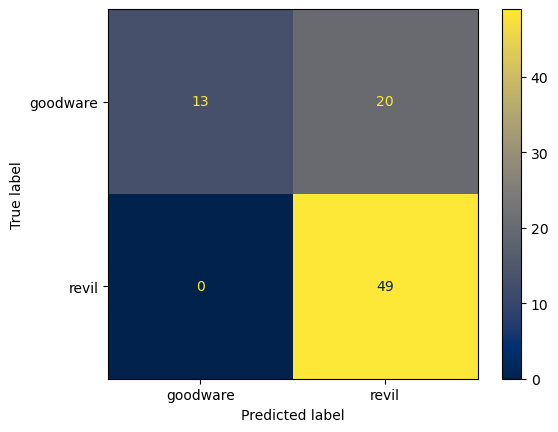

In [27]:
# SVM com GridSearch
param_gridsvm = {'C': [1,3,5,7,10,20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
modelsvmgrid = GridSearchCV(svm.SVC(gamma='auto'), param_grid=param_gridsvm, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelsvmgrid.fit(train_features, train_labels)
predictsvm = modelsvmgrid.predict(test_features)
print(metrics.classification_report(test_labels, predictsvm))
print(modelsvmgrid.best_params_)
cm = metrics.confusion_matrix(test_labels, predictsvm)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelsvmgrid.classes_).plot(cmap='cividis')
%time

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes

              precision    recall  f1-score   support

    goodware       0.85      1.00      0.92        33
       revil       1.00      0.88      0.93        49

    accuracy                           0.93        82
   macro avg       0.92      0.94      0.93        82
weighted avg       0.94      0.93      0.93        82

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 μs
Wall time: 3.1 μs


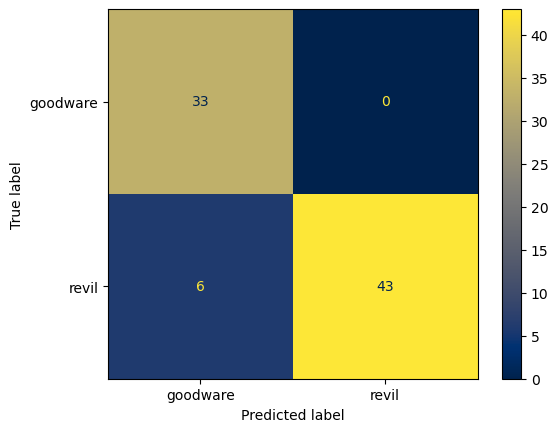

In [29]:
# In the case of Naive Bayes, there are no hyperparameters to adjust, so using Grid Search doesn’t make sense.
modelGNB = GaussianNB()
modelGNB.fit(train_features, train_labels)
previsaoGNB = modelGNB.predict(test_features)
print(metrics.classification_report(test_labels, previsaoGNB))
cm = metrics.confusion_matrix(test_labels, previsaoGNB)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelGNB.classes_).plot(cmap='cividis')
%time

In [30]:
from sklearn import tree

              precision    recall  f1-score   support

    goodware       1.00      1.00      1.00        33
       revil       1.00      1.00      1.00        49

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

{'criterion': 'gini', 'max_depth': 4}
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.91 μs


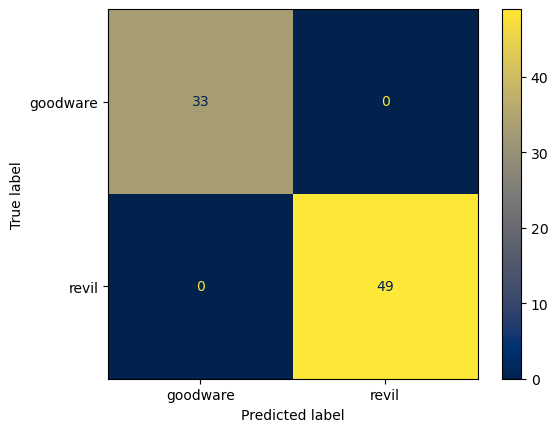

In [31]:
# Decision Tree com GridSearch
param_gridtree = {'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,9,10,11,12]}
modeltreegrid = GridSearchCV(tree.DecisionTreeClassifier(random_state=9), param_grid=param_gridtree, n_jobs=-1, refit=True, cv=5, error_score='raise')
modeltreegrid.fit(train_features, train_labels)
predicttree = modeltreegrid.predict(test_features)
print(metrics.classification_report(test_labels, predicttree))
print(modeltreegrid.best_params_)
cm = metrics.confusion_matrix(test_labels, predicttree)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modeltreegrid.classes_).plot(cmap='cividis')
%time

In [32]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

    goodware       0.94      1.00      0.97        33
       revil       1.00      0.96      0.98        49

    accuracy                           0.98        82
   macro avg       0.97      0.98      0.97        82
weighted avg       0.98      0.98      0.98        82

{'criterion': 'gini', 'n_estimators': 84}
CPU times: user 1 μs, sys: 1 μs, total: 2 μs
Wall time: 2.62 μs


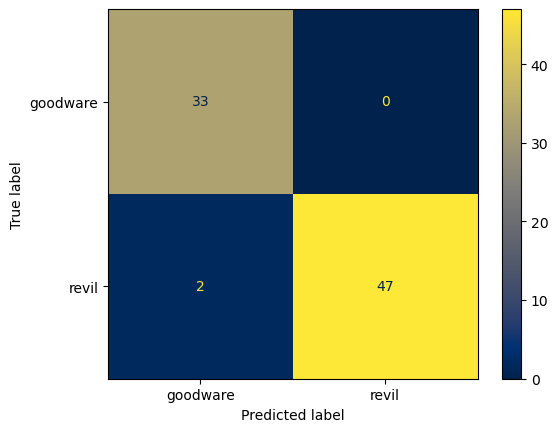

In [34]:
# RandomForest com GridSearch

# In the first attempt, the search stopped at 80. To find the optimal parameter, I performed a new test from 80 to 90.
# param_gridrf = {"n_estimators": [1,3,5,7,10,20,30,50,60,70,80,100], 'criterion':['gini', 'entropy']} 

param_gridrf = {"n_estimators": [80,81,82,83,84,85,86,87], 'criterion':['gini', 'entropy']}

modelrfgrid = GridSearchCV(RandomForestClassifier(), param_gridrf, n_jobs=-1, cv=5, error_score='raise')
modelrfgrid.fit(train_features, train_labels)
predictrf = modelrfgrid.predict(test_features)
print(metrics.classification_report(test_labels, predictrf))
print(modelrfgrid.best_params_)
cm = metrics.confusion_matrix(test_labels, predictrf)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelrfgrid.classes_).plot(cmap='cividis')
%time

The MLP encountered a ZeroDivisionError (both when using Grid Search and without it).

In [35]:
from sklearn.neural_network import MLPClassifier

Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], or standardize it to have mean 0 and variance 1. Note that you must apply the same scaling to the test set for meaningful results. You can use StandardScaler for standardization.

**The Input Layer:** the number of neurons comprising that layer is equal to the number of features (columns) in your data.

**The Output Layer:** If the NN is a classifier, then it also has a single node unless softmax is used in which case the output layer has one node per class label in your model.

**The Hidden Layers:** One hidden layer is sufficient for the large majority of problems. The most commonly relied on is 'the optimal size of the hidden layer is usually between the size of the input and size of the output layers'. In sum, for most problems, one could probably get decent performance (even without a second optimization step) by setting the hidden layer configuration using just two rules: (i) the number of hidden layers equals one; and (ii) the number of neurons in that layer is the mean of the neurons in the input and output layers.

In [36]:
# MLP com GridSearch

#param_gridmlp = {'hidden_layer_sizes': [(4,4), (50,50,50), (50,100,50), (100,)],'solver':['lbfgs', 'sgd','adam'],  'activation': ['logistic', 'relu', 'identity', 'tanh'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive']}
#modelmlpgrid = GridSearchCV(MLPClassifier(hidden_layer_sizes=(4,4), max_iter=50000000, tol=0.0001, random_state = 12, verbose = True), param_gridmlp, n_jobs=-1, cv=5, error_score='raise')
#modelmlpgrid.fit(previsores_treinamento, classe_treinamento)
#predictmlp = modelmlpgrid.predict(previsores_teste)
#print(metrics.classification_report(classe_teste, predictmlp))
#print(modelmlpgrid.best_params_)
#cm = metrics.confusion_matrix(classe_teste, predictmlp)
#metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelmlpgrid.classes_).plot(cmap='cividis')
#%time

Iteration 1, loss = 0.69471238
Iteration 2, loss = 0.69304719
Iteration 3, loss = 0.69196450
Iteration 4, loss = 0.69087277
Iteration 5, loss = 0.68971639
Iteration 6, loss = 0.68866601
Iteration 7, loss = 0.68761835
Iteration 8, loss = 0.68650391
Iteration 9, loss = 0.68530507
Iteration 10, loss = 0.68401718
Iteration 11, loss = 0.68263376
Iteration 12, loss = 0.68096537
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
              precision    recall  f1-score   support

    goodware       0.00      0.00      0.00        33
       revil       0.60      1.00      0.75        49

    accuracy                           0.60        82
   macro avg       0.30      0.50      0.37        82
weighted avg       0.36      0.60      0.45        82

CPU times: user 4 μs, sys: 20 μs, total: 24 μs
Wall time: 4.05 μs


/Users/hanhf/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hanhf/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hanhf/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


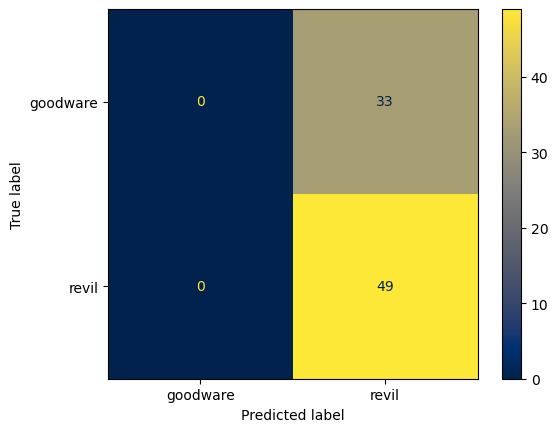

In [37]:
modelmlp = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=50000000, tol=0.01, random_state = 12, verbose = True, activation='relu', solver='adam')
modelmlp.fit(train_features, train_labels)
predictmlp = modelmlp.predict(test_features)
print(metrics.classification_report(test_labels, predictmlp))
cm = metrics.confusion_matrix(test_labels, predictmlp)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelmlp.classes_).plot(cmap='cividis')
%time

#Provide an overall summary of the classifications performed without the Standard Scaler for the API call approach

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()
table_sc = sc.fit_transform(table)
table_sc

array([[-0.57266975, -0.52906978, -0.51104383, ..., -0.07832604,
        -0.07832604, -0.07832604],
       [-0.58013561, -0.5346137 , -0.52936217, ..., -0.07832604,
        -0.07832604, -0.07832604],
       [-0.57950228, -0.53124103, -0.52953827, ..., -0.07832604,
        -0.07832604, -0.07832604],
       ...,
       [-0.58504013, -0.54068375, -0.53969099, ..., -0.07832604,
        -0.07832604, -0.07832604],
       [-0.58504013, -0.54068375, -0.53969099, ..., -0.07832604,
        -0.07832604, -0.07832604],
       [-0.58504013, -0.54068375, -0.53969099, ..., -0.07832604,
        -0.07832604, -0.07832604]])

In [41]:
from sklearn.model_selection import train_test_split
train_features_sc, test_features_sc, train_labels, test_labels = train_test_split(table_sc, classes, test_size=TestSize, random_state=1)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Insert the Grid Search for the classifiers here, following the same approach used above

              precision    recall  f1-score   support

    goodware       0.44      0.97      0.60        33
       revil       0.89      0.16      0.28        49

    accuracy                           0.49        82
   macro avg       0.66      0.57      0.44        82
weighted avg       0.71      0.49      0.41        82

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
CPU times: user 4 μs, sys: 45 μs, total: 49 μs
Wall time: 7.15 μs


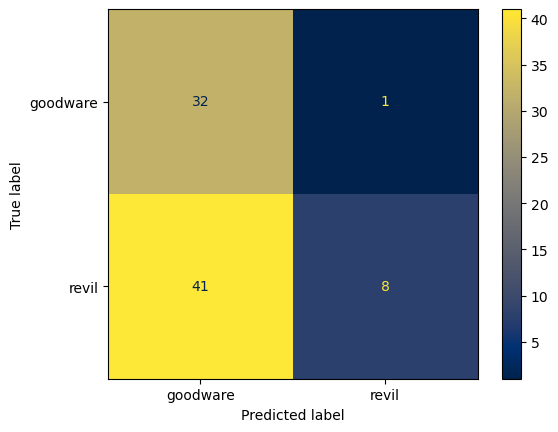

In [43]:
# KNN com Grid Search CV com StandardScaler
param_gridKNN_sc = {'n_neighbors': [1,3,5,7,9],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']}
modelKNNgrid_sc = GridSearchCV(KNeighborsClassifier(), param_grid=param_gridKNN_sc, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelKNNgrid_sc.fit(train_features_sc, train_labels)
predictKNNgrid_sc = modelKNNgrid_sc.predict(test_features_sc)
print(metrics.classification_report(test_labels, predictKNNgrid_sc))
print(modelKNNgrid_sc.best_params_)
cm = metrics.confusion_matrix(test_labels, predictKNNgrid_sc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelKNNgrid_sc.classes_).plot(cmap='cividis')
%time

In [44]:
from sklearn import svm

              precision    recall  f1-score   support

    goodware       0.56      0.97      0.71        33
       revil       0.96      0.49      0.65        49

    accuracy                           0.68        82
   macro avg       0.76      0.73      0.68        82
weighted avg       0.80      0.68      0.67        82

{'C': 1, 'kernel': 'linear'}
CPU times: user 1e+03 ns, sys: 1 μs, total: 2 μs
Wall time: 2.86 μs


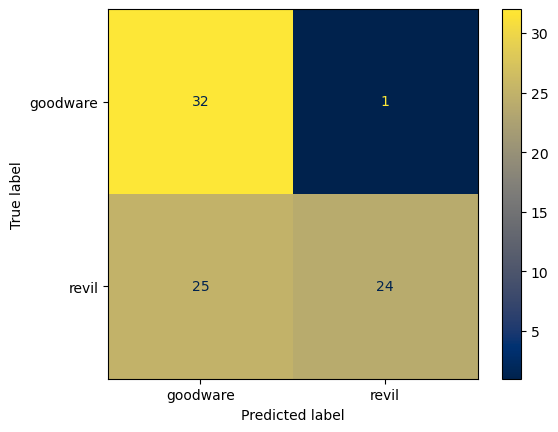

In [45]:
# SVM com Grid Search CV StandardScaler
param_gridsvm_sc = {'C': [1,3,5,7,10,20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
modelsvmgrid_sc = GridSearchCV(svm.SVC(gamma='auto'), param_grid=param_gridsvm_sc, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelsvmgrid_sc.fit(train_features_sc, train_labels)
predictsvm_sc = modelsvmgrid_sc.predict(test_features_sc)
print(metrics.classification_report(test_labels, predictsvm_sc))
print(modelsvmgrid_sc.best_params_)
cm = metrics.confusion_matrix(test_labels, predictsvm_sc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelsvmgrid_sc.classes_).plot(cmap='cividis')
%time

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes

              precision    recall  f1-score   support

    goodware       0.89      0.94      0.91        33
       revil       0.96      0.92      0.94        49

    accuracy                           0.93        82
   macro avg       0.92      0.93      0.92        82
weighted avg       0.93      0.93      0.93        82

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.15 μs


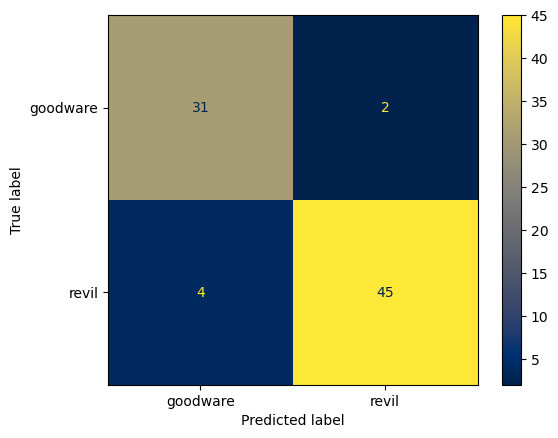

In [47]:
# Naive Bayes com StandardScaler
# No caso do Naive Bayes, não há hiperparâmetros para manipular, logo não faz sentido utilizar GridSearch
modelGNB_sc = GaussianNB()
modelGNB_sc.fit(train_features_sc, train_labels)
previsaoGNB_sc = modelGNB_sc.predict(test_features_sc)
print(metrics.classification_report(test_labels, previsaoGNB_sc))
cm = metrics.confusion_matrix(test_labels, previsaoGNB_sc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelGNB_sc.classes_).plot(cmap='cividis')
%time

In [48]:
from sklearn import tree

              precision    recall  f1-score   support

    goodware       1.00      1.00      1.00        33
       revil       1.00      1.00      1.00        49

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

{'criterion': 'gini', 'max_depth': 4}
CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 μs
Wall time: 2.15 μs


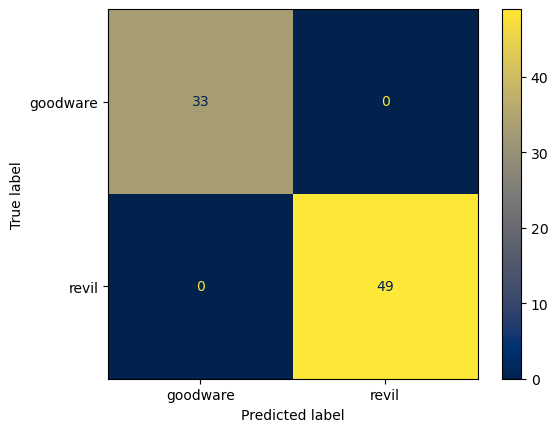

In [49]:
# Decision Tree com Grid Search CV StandardScaler
param_gridtree_sc = {'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,9,10,11,12]}
modeltreegrid_sc = GridSearchCV(tree.DecisionTreeClassifier(random_state=9), param_grid=param_gridtree_sc, n_jobs=-1, refit=True, cv=5, error_score='raise')
modeltreegrid_sc.fit(train_features_sc, train_labels)
predicttree_sc = modeltreegrid_sc.predict(test_features_sc)
print(metrics.classification_report(test_labels, predicttree_sc))
print(modeltreegrid_sc.best_params_)
cm = metrics.confusion_matrix(test_labels, predicttree_sc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modeltreegrid_sc.classes_).plot(cmap='cividis')
%time

In [50]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

    goodware       0.97      1.00      0.99        33
       revil       1.00      0.98      0.99        49

    accuracy                           0.99        82
   macro avg       0.99      0.99      0.99        82
weighted avg       0.99      0.99      0.99        82

{'criterion': 'entropy', 'n_estimators': 80}
CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 μs
Wall time: 1.91 μs


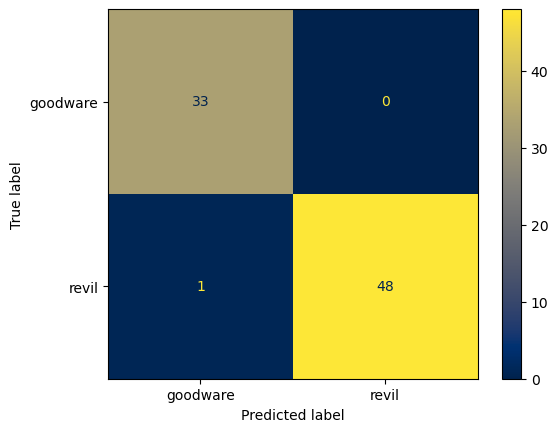

In [51]:
# Random Forest com Grid Search CV StandardScaler

#param_gridrf_sc = {"n_estimators": [1,3,5,7,10,20,30,50,60,70,80,100], 'criterion':['gini', 'entropy']} # Na primeira tentativa, a busca parou no 80. Para achar o parametro ótimo, fiz novo teste desde 80 até 90

param_gridrf_sc = {"n_estimators": [80,81,82,83,84,85,86,87], 'criterion':['gini', 'entropy']}

modelrfgrid_sc = GridSearchCV(RandomForestClassifier(), param_gridrf_sc, n_jobs=-1, cv=5, error_score='raise')
modelrfgrid_sc.fit(train_features_sc, train_labels)
predictrf_sc = modelrfgrid_sc.predict(test_features_sc)
print(metrics.classification_report(test_labels, predictrf_sc))
print(modelrfgrid_sc.best_params_)
cm = metrics.confusion_matrix(test_labels, predictrf_sc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelrfgrid_sc.classes_).plot(cmap='cividis')
%time

In [52]:
from sklearn.neural_network import MLPClassifier

Iteration 1, loss = 0.77130021
Iteration 2, loss = 6.65345686
Iteration 3, loss = 2.03181598
Iteration 4, loss = 10.11101845
Iteration 5, loss = 10.11118476
Iteration 6, loss = 3.79072352
Iteration 7, loss = 11.83627483
Iteration 8, loss = 11.93381682
Iteration 9, loss = 1.75686913
Iteration 10, loss = 10.11191504
Iteration 11, loss = 10.11203561
Iteration 12, loss = 10.11214575
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
              precision    recall  f1-score   support

    goodware       0.65      0.97      0.78        33
       revil       0.97      0.65      0.78        49

    accuracy                           0.78        82
   macro avg       0.81      0.81      0.78        82
weighted avg       0.84      0.78      0.78        82

CPU times: user 3 μs, sys: 14 μs, total: 17 μs
Wall time: 7.15 μs


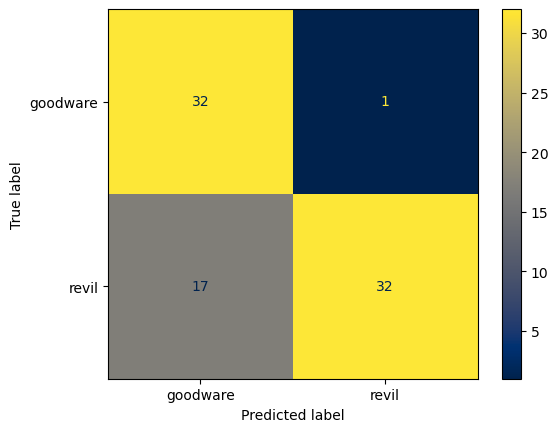

In [53]:
# MLP com Grid Search CV StandardScaler
modelmlp_sc = MLPClassifier(hidden_layer_sizes=(500,200,10), max_iter=50000000, tol=0.01, random_state = 12, verbose = True, activation='relu', solver='adam')
modelmlp_sc.fit(train_features_sc, train_labels)
predictmlp_sc = modelmlp_sc.predict(test_features_sc)
print(metrics.classification_report(test_labels, predictmlp_sc))
cm = metrics.confusion_matrix(test_labels, predictmlp_sc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelmlp_sc.classes_).plot(cmap='cividis')
%time

In [54]:
from sklearn.decomposition import PCA

In [55]:
pca = PCA(n_components=100) # da pra fazer Grid Search com PCA? Qual a quantidade ótima de parametros para melhorar a classificação?
table_pca = pca.fit_transform(table_sc)

In [ ]:
#df_pca = pandas.DataFrame(table_pca)
#df_pca

In [56]:
train_features_pca, test_features_pca, train_labels, test_labels = train_test_split(table_pca, classes, test_size=TestSize, random_state=1)

              precision    recall  f1-score   support

    goodware       0.45      0.85      0.59        33
       revil       0.75      0.31      0.43        49

    accuracy                           0.52        82
   macro avg       0.60      0.58      0.51        82
weighted avg       0.63      0.52      0.50        82

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.15 μs


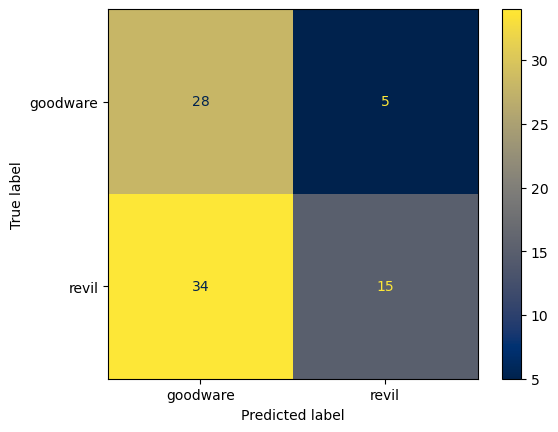

In [57]:
# KNN com GrideSarch e PCA
param_gridKNN_PCA = {'n_neighbors': [1,3,5,7,9],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']}
modelKNNgrid_PCA = GridSearchCV(KNeighborsClassifier(), param_grid=param_gridKNN_PCA, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelKNNgrid_PCA.fit(train_features_pca, train_labels)
predictKNNgrid_PCA = modelKNNgrid_PCA.predict(test_features_pca)
print(metrics.classification_report(test_labels, predictKNNgrid_PCA))
print(modelKNNgrid_PCA.best_params_)
cm = metrics.confusion_matrix(test_labels, predictKNNgrid_PCA)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelKNNgrid_PCA.classes_).plot(cmap='cividis')
%time

              precision    recall  f1-score   support

    goodware       0.95      0.61      0.74        33
       revil       0.79      0.98      0.87        49

    accuracy                           0.83        82
   macro avg       0.87      0.79      0.81        82
weighted avg       0.85      0.83      0.82        82

{'C': 1, 'kernel': 'rbf'}
CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 μs
Wall time: 3.1 μs


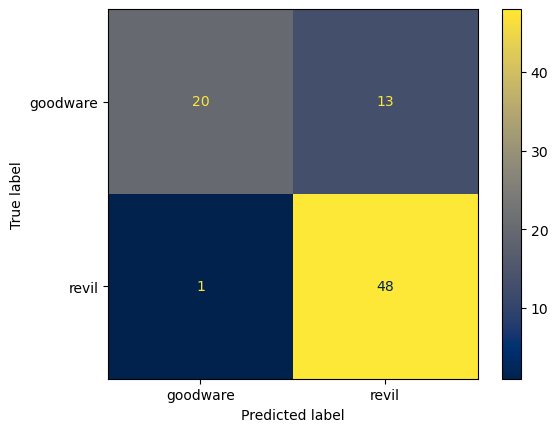

In [58]:
# SVM com Grid Search CV PCA
param_gridsvm_PCA = {'C': [1,3,5,7,10,20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
modelsvmgrid_PCA = GridSearchCV(svm.SVC(gamma='auto'), param_grid=param_gridsvm_PCA, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelsvmgrid_PCA.fit(train_features_pca, train_labels)
predictsvm_pca = modelsvmgrid_PCA.predict(test_features_pca)
print(metrics.classification_report(test_labels, predictsvm_pca))
print(modelsvmgrid_PCA.best_params_)
cm = metrics.confusion_matrix(test_labels, predictsvm_pca)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelsvmgrid_PCA.classes_).plot(cmap='cividis')
%time

              precision    recall  f1-score   support

    goodware       0.97      0.88      0.92        33
       revil       0.92      0.98      0.95        49

    accuracy                           0.94        82
   macro avg       0.94      0.93      0.94        82
weighted avg       0.94      0.94      0.94        82

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 μs
Wall time: 4.29 μs


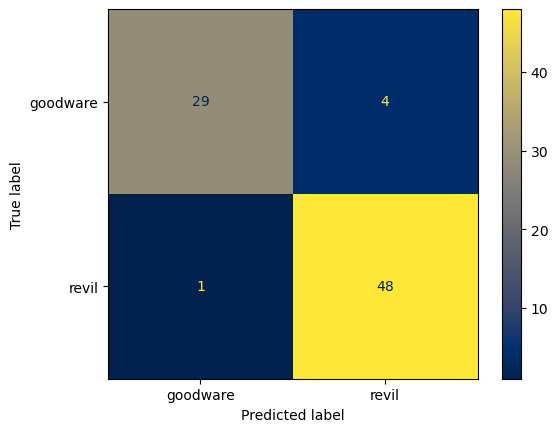

In [59]:
# Naive Bayes com PCA
# No caso do Naive Bayes, não há hiperparâmetros para manipular, logo não faz sentido utilizar GridSearch
modelGNB_PCA = GaussianNB()
modelGNB_PCA.fit(train_features_pca, train_labels)
previsaoGNB_PCA = modelGNB_PCA.predict(test_features_pca)
print(metrics.classification_report(test_labels, previsaoGNB_PCA))
cm = metrics.confusion_matrix(test_labels, previsaoGNB_PCA)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelGNB_PCA.classes_).plot(cmap='cividis')
%time

              precision    recall  f1-score   support

    goodware       1.00      1.00      1.00        33
       revil       1.00      1.00      1.00        49

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

{'criterion': 'gini', 'max_depth': 4}
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 μs


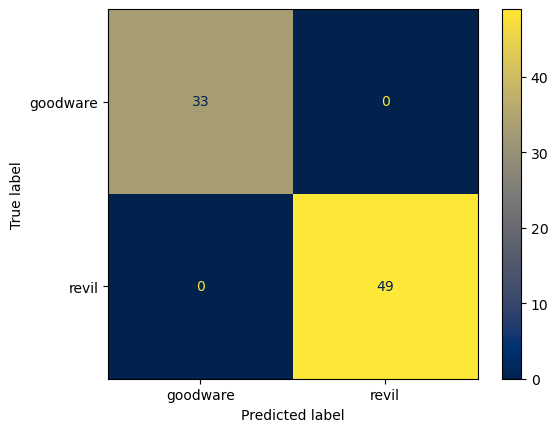

In [60]:
# Decision Tree com Grid Search CV e PCA
param_gridtree_PCA = {'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,9,10,11,12]}
modeltreegrid_PCA = GridSearchCV(tree.DecisionTreeClassifier(random_state=9), param_grid=param_gridtree_PCA, n_jobs=-1, refit=True, cv=5, error_score='raise')
modeltreegrid_PCA.fit(train_features_sc, train_labels)
predicttree_PCA = modeltreegrid_PCA.predict(test_features_sc)
print(metrics.classification_report(test_labels, predicttree_PCA))
print(modeltreegrid_PCA.best_params_)
cm = metrics.confusion_matrix(test_labels, predicttree_PCA)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modeltreegrid_PCA.classes_).plot(cmap='cividis')
%time

              precision    recall  f1-score   support

    goodware       0.96      0.76      0.85        33
       revil       0.86      0.98      0.91        49

    accuracy                           0.89        82
   macro avg       0.91      0.87      0.88        82
weighted avg       0.90      0.89      0.89        82

{'criterion': 'entropy', 'n_estimators': 10}
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.15 μs


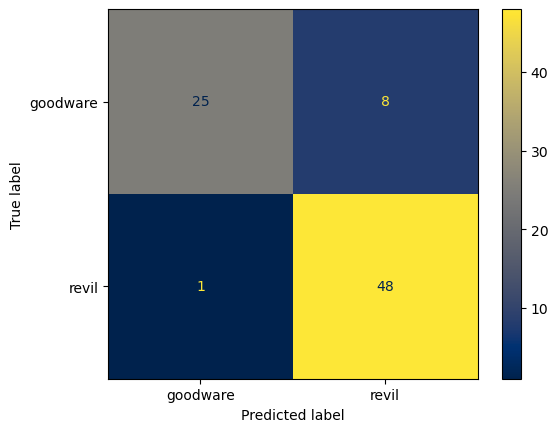

In [61]:
# Random Forest com Grid Search CV e PCA

param_gridrf_PCA = {"n_estimators": [1,3,5,7,10,20,30,50,60,70,80,100], 'criterion':['gini', 'entropy']} # Na primeira tentativa, a busca parou no 80. Para achar o parametro ótimo, fiz novo teste desde 80 até 90

#param_gridrf_PCA = {"n_estimators": [80,81,82,83,84,85,86,87], 'criterion':['gini', 'entropy']}

modelrfgrid_PCA = GridSearchCV(RandomForestClassifier(), param_gridrf_PCA, n_jobs=-1, cv=5, error_score='raise')
modelrfgrid_PCA.fit(train_features_pca, train_labels)
predictrf_pca = modelrfgrid_PCA.predict(test_features_pca)
print(metrics.classification_report(test_labels, predictrf_pca))
print(modelrfgrid_PCA.best_params_)
cm = metrics.confusion_matrix(test_labels, predictrf_pca)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelrfgrid_PCA.classes_).plot(cmap='cividis')
%time

Iteration 1, loss = 2.38995380
Iteration 2, loss = 2.53912872
Iteration 3, loss = 0.76809621
Iteration 4, loss = 0.50621405
Iteration 5, loss = 0.49975855
Iteration 6, loss = 0.34116850
Iteration 7, loss = 0.25459182
Iteration 8, loss = 0.30713541
Iteration 9, loss = 0.28699139
Iteration 10, loss = 0.21158327
Iteration 11, loss = 0.18665823
Iteration 12, loss = 0.19819122
Iteration 13, loss = 0.20159320
Iteration 14, loss = 0.18246682
Iteration 15, loss = 0.15654275
Iteration 16, loss = 0.14218380
Iteration 17, loss = 0.14075656
Iteration 18, loss = 0.14125050
Iteration 19, loss = 0.13666445
Iteration 20, loss = 0.12675201
Iteration 21, loss = 0.11685986
Iteration 22, loss = 0.11079772
Iteration 23, loss = 0.10832258
Iteration 24, loss = 0.10770782
Iteration 25, loss = 0.10673344
Iteration 26, loss = 0.10405735
Iteration 27, loss = 0.10007483
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
              precision    recall  f1-score   support



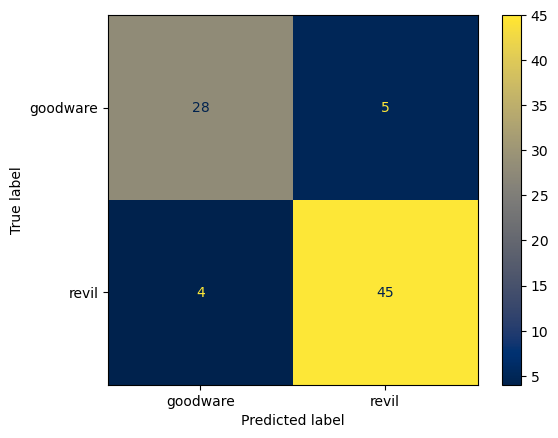

In [62]:
# MLP com Grid Search CV e PCA
modelmlp_pca = MLPClassifier(hidden_layer_sizes=(500,200,10), max_iter=50000000, tol=0.01, random_state = 12, verbose = True, activation='relu', solver='adam')
modelmlp_pca.fit(train_features_pca, train_labels)
predictmlp_pca = modelmlp_pca.predict(test_features_pca)
print(metrics.classification_report(test_labels, predictmlp_pca))
cm = metrics.confusion_matrix(test_labels, predictmlp_pca)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelmlp_pca.classes_).plot(cmap='cividis')
%time